In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import cv2

In [22]:
x_train = []
x_val = []
y_train = []
y_val = []

# Healthy data set....................................................

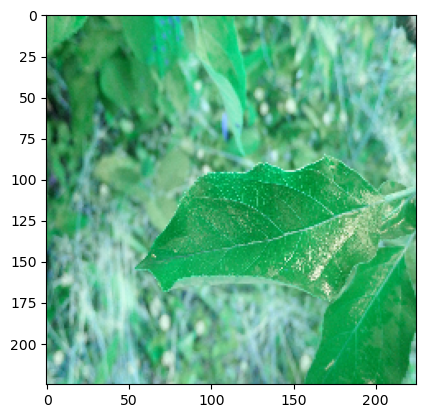

In [23]:
for i in os.listdir("iMAGE/Train/Healthy/"):
    img = cv2.imread("iMAGE/Train/Healthy/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(0)
    
    
    
for i in os.listdir("iMAGE/Validation/Healthy/"):
    img = cv2.imread("iMAGE/Validation/Healthy/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(0)
    
    
    
plt.imshow(x_train[0])
plt.show()

# Rust data set.......................................................

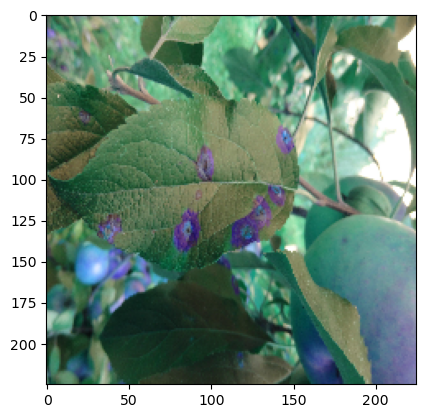

In [24]:
for i in os.listdir("iMAGE/Train/Rust/"):
    img = cv2.imread("iMAGE/Train/Rust/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(1)
    
    
    
for i in os.listdir("iMAGE/Validation/Rust/"):
    img = cv2.imread("iMAGE/Validation/Rust/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(1)
    
    
    
plt.imshow(x_train[600])
plt.show()

# Powdery data set...........................................

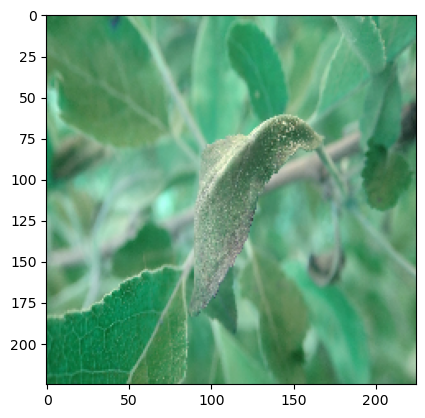

In [25]:
for i in os.listdir("iMAGE/Train/Powdery/"):
    img = cv2.imread("iMAGE/Train/Powdery/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(2)
    
    
    
for i in os.listdir("iMAGE/Validation/Powdery/"):
    img = cv2.imread("iMAGE/Validation/Powdery/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(2)
    
    
    
plt.imshow(x_train[1100])
plt.show()

# Preprocessing Of Data

In [27]:
#Convert np.array from list of Image
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
print("Shape of Training IMG : ",x_train.shape)
print("Shape of Training Target :",y_train.shape)
print("Shape of Validation IMG : ",x_val.shape)
print("Shape of Validation Target :",y_val.shape)

#Changing the Range from 0-255 to 0-1
x_train = x_train/255
x_val = x_val/255

#Categorizing the target 
from keras.utils import to_categorical
print("Total Number of Class : ",np.unique(y_val))
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print("Shape of Training Target after converting it into categorical : ",y_train.shape)
print("Shape of Validation Target after converting it into categorical : ",y_val.shape)

#Mixing The Data
from sklearn.model_selection import train_test_split
x_train,_,y_train,_ = train_test_split(x_train,y_train,test_size=0.000000000000000000000000000000000000001,random_state=30)
x_val,_,y_val,_ = train_test_split(x_val,y_val,test_size=0.000000000000000000000000000000000000001,random_state=30)

print("Final shapes......................................")
print("Shape of Training IMG : ",x_train.shape)
print("Shape of Training Target :",y_train.shape)
print("Shape of Validation IMG : ",x_val.shape)
print("Shape of Validation Target :",y_val.shape)

Shape of Training IMG :  (1322, 225, 225, 3)
Shape of Training Target : (1322,)
Shape of Validation IMG :  (60, 225, 225, 3)
Shape of Validation Target : (60,)
Total Number of Class :  [0 1 2]
Shape of Training Target after converting it into categorical :  (1322, 3)
Shape of Validation Target after converting it into categorical :  (60, 3)
Final shapes......................................
Shape of Training IMG :  (1321, 225, 225, 3)
Shape of Training Target : (1321, 3)
Shape of Validation IMG :  (59, 225, 225, 3)
Shape of Validation Target : (59, 3)


# Model Initializing

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225,225, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Taining data with Validation Data

In [39]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val), validation_batch_size=16)

Epoch 1/5
42/42 [==============================] - 49s 1s/step - loss: 1.1154 - accuracy: 0.4156 - val_loss: 0.8693 - val_accuracy: 0.5085
Epoch 2/5
42/42 [==============================] - 52s 1s/step - loss: 0.6160 - accuracy: 0.7396 - val_loss: 0.7271 - val_accuracy: 0.6780
Epoch 3/5
42/42 [==============================] - 58s 1s/step - loss: 0.5750 - accuracy: 0.7555 - val_loss: 0.6527 - val_accuracy: 0.6949
Epoch 4/5
42/42 [==============================] - 57s 1s/step - loss: 0.4979 - accuracy: 0.7911 - val_loss: 0.6797 - val_accuracy: 0.7119
Epoch 5/5
42/42 [==============================] - 56s 1s/step - loss: 0.4241 - accuracy: 0.8213 - val_loss: 0.8840 - val_accuracy: 0.5763


<Axes: >

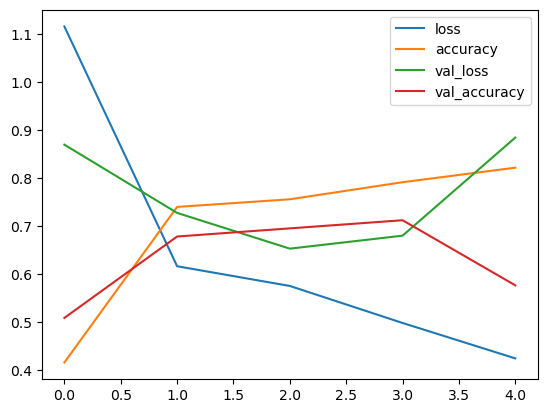

In [40]:
lossPlot = pd.DataFrame(model.history.history)
lossPlot.plot()

In [41]:
model.save("model.h5")

In [75]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
#    x = x[50:175 , 50:175]
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

def Predict(Path,data):
    OutPut_Validation = {0: "Healthy", 1:"Rust", 2:"Powdery"}
    predictions = model.predict(preprocess_image(Path+data))
    predicted_label = OutPut_Validation[np.argmax(predictions)]
    print(predicted_label)
    return predicted_label
    #return list(OutPut_Validation.keys())[list(OutPut_Validation.values()).index(predicted_label)]

In [78]:
Y_actual = []
Y_pred = []

#Healthy TEST...............................................................................................................
Path_Healthy = "iMAGE/Test/Healthy/"
print("Healthy Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append("Healthy")
    Y_pred.append(Predict(Path_Healthy,i))

    
#Rust TEST..................................................................................................................
Path_Healthy = "iMAGE/Test/Rust/"
print("Rust Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append("Rust")
    Y_pred.append(Predict(Path_Healthy,i))

    
#Powdery TEST...............................................................................................................
Path_Healthy = "iMAGE/Test/Powdery/"
print("Powdery Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append("Powdery")
    Y_pred.append(Predict(Path_Healthy,i))
#Y_actual = to_categorical(Y_actual)


Healthy Data...................................
1/1 [==============================] - 0s 28ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 34ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Rust
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 36ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 32ms/step
Rust
1/1 [==============================] - 0s 30ms/step
Rust
1

Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 34ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Powdery
1/1 [==============================] - 0s 33ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Powdery
1/1 [==============================] - 0s 35ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Healthy


In [79]:
from sklearn.metrics import classification_report
print(classification_report(np.array(Y_pred),np.array(Y_actual)))

              precision    recall  f1-score   support

     Healthy       0.62      0.49      0.55        63
     Powdery       0.86      0.78      0.82        55
        Rust       0.36      0.56      0.44        32

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.60       150
weighted avg       0.65      0.61      0.62       150



In [76]:
Y_actual = []
Y_pred = []

#Healthy TEST...............................................................................................................
Path_Healthy = "iMAGE/Test/Healthy/"
print("Healthy Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append(0)
    Y_pred.append(Predict(Path_Healthy,i))

    
#Rust TEST..................................................................................................................
Path_Healthy = "iMAGE/Test/Rust/"
print("Rust Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append(1)
    Y_pred.append(Predict(Path_Healthy,i))

    
#Powdery TEST...............................................................................................................
Path_Healthy = "iMAGE/Test/Powdery/"
print("Powdery Data...................................")
for i in os.listdir(Path_Healthy):
    Y_actual.append(2)
    Y_pred.append(Predict(Path_Healthy,i))
#Y_actual = to_categorical(Y_actual)


Healthy Data...................................
1/1 [==============================] - 0s 28ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 33ms/step
Healthy
1/1 [==============================] - 0s 33ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 35ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 47ms/step
Rust
1/1 [==============================] - 0s 52ms/step
Healthy
1/1 [==============================] - 0s 31ms/step
Healthy
1/1 [==============================] - 0s 30ms/step
Healthy
1/1 [==============================] - 0s 32ms/step
Rust
1/1 [==============================] - 0s 38ms/step
Rust
1

Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 29ms/step
Powdery
1/1 [==============================] - 0s 38ms/step
Powdery
1/1 [==============================] - 0s 35ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Powdery
1/1 [==============================] - 0s 32ms/step
Powdery
1/1 [==============================] - 0s 31ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Powdery
1/1 [==============================] - 0s 30ms/step
Healthy
